**obsidiantools in 10 minutes**

# Libraries and config

In [1]:
# built-in libs
import os
from pathlib import Path

# obsidiantools requirements
import numpy as np
import pandas as pd
import networkx as nx

# extra libs for this notebook (visualise graph)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip show obsidiantools

Name: obsidiantools
Version: 0.6.0
Summary: Obsidian Tools - a Python interface for Obsidian.md vaults
Home-page: https://github.com/mfarragher/obsidiantools
Author: Mark Farragher
Author-email: 
License: BSD
Location: /home/mark/miniconda3/envs/obsidian2/lib/python3.9/site-packages
Requires: html2text, lxml, networkx, pandas, beautifulsoup4, numpy, python-frontmatter, markdown
Required-by: 


## Vault directory

In [3]:
VAULT_DIR = Path(os.getcwd()) / 'vault-stub'

In [4]:
VAULT_DIR.exists()

True

## Obsidian tools

In [5]:
import obsidiantools.api as otools  # api shorthand

# Explore your vault

## Simple one-liner for setup 😎

The `Vault` class is the object you need for exploring your vault.  Set up the object with the path to your directory.

**CONNECT** is the method for connecting all your vault notes.  Once that is done, you will be able to access various details about your vault's notes.

In [6]:
vault = otools.Vault(VAULT_DIR).connect()

Attribute that says whether vault is connected:

In [7]:
vault.is_connected

True

Attribute that stores the location of your vault

In [8]:
vault.dirpath

PosixPath('/home/mark/Github/obsidiantools-demo/vault-stub')

## Tell me about my vault...

### 1. What files do I have in my vault?

In [9]:
vault.file_index

{'Sussudio': PosixPath('Sussudio.md'),
 'Brevissimus moenia': PosixPath('lipsum/Brevissimus moenia.md'),
 'Ne fuit': PosixPath('lipsum/Ne fuit.md'),
 'Alimenta': PosixPath('lipsum/Alimenta.md'),
 'Vulnera ubera': PosixPath('lipsum/Vulnera ubera.md'),
 'Causam mihi': PosixPath('lipsum/Causam mihi.md')}

### 2. Which notes are 'isolated' in my vault?

In graph analysis, nodes are **isolated** if they do not connect to other nodes in a graph.  Each NOTE in your vault in graph terminology is a node.

In the Obsidian world, what does it mean for notes to be isolated?

**Isolated notes** have **no backlinks** AND **no wikilinks**.

In [10]:
vault.isolated_notes

['Sussudio']

In the Obsidian community these notes are often called 'orphan notes'.  This interface is sticking to graph analysis terminology; NetworkX calls the graph nodes 'isolates'.

### 3. Which notes have I not got round to creating yet?

When you create wikilinks in your vault notes, you can create connections to notes that you haven't created yet.  This means that these new notes have backlinks and are displayed in your vault graph, but they don't exist as markdown files.

In this interface these are called **nonexistent notes**.

In [11]:
vault.nonexistent_notes

['Aras Teucras',
 'Vita',
 'Virtus',
 'Bacchus',
 'Aetna',
 'Tarpeia',
 'Tydides',
 'Caelum',
 'Dives',
 'Amor',
 'Manus']

### 4. What are the notes that have the most backlinks?

The **`get_note_metadata`** method gives a summary of your vault's notes.

You can see, for example:
- Counts of backlinks (`n_backlinks`)
- Counts of wikilinks (`n_wikilinks`)
- Counts of embedded files (`n_embedded_files`)
- Modified time (`modified_time`)

Note: created time is available across all operating systems so that is not included.

In [12]:
df = vault.get_note_metadata()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Sussudio to Aetna
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rel_filepath      6 non-null      object        
 1   abs_filepath      6 non-null      object        
 2   note_exists       17 non-null     bool          
 3   n_backlinks       17 non-null     int64         
 4   n_wikilinks       6 non-null      float64       
 5   n_embedded_files  6 non-null      float64       
 6   modified_time     6 non-null      datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 969.0+ bytes


Sort these notes by number of backlinks (descending order).

In [14]:
df.sort_values('n_backlinks', ascending=False)

,rel_filepath,abs_filepath,note_exists,n_backlinks,n_wikilinks,n_embedded_files,modified_time
note,,,,,,,
Bacchus,NaN,NaN,False,5,NaN,NaN,NaT
Vita,NaN,NaN,False,3,NaN,NaN,NaT
Manus,NaN,NaN,False,3,NaN,NaN,NaT
Tarpeia,NaN,NaN,False,3,NaN,NaN,NaT
Caelum,NaN,NaN,False,3,NaN,NaN,NaT
Ne fuit,lipsum/Ne fuit.md,/home/mark/Github/obsidiantools-demo/vault-stu...,True,2,6.0,0.0,2021-09-11 10:12:24.124289036
Amor,NaN,NaN,False,2,NaN,NaN,NaT
Dives,NaN,NaN,False,1,NaN,NaN,NaT
Tydides,NaN,NaN,False,1,NaN,NaN,NaT


We can see that **Bacchus** has the most backlinks.  It's actually a nonexistent note.

In [15]:
vault.get_backlinks('Bacchus')

['Ne fuit', 'Alimenta', 'Alimenta', 'Alimenta', 'Alimenta']

In [16]:
vault.get_backlink_counts('Bacchus')

{'Ne fuit': 1, 'Alimenta': 4}

You can see all the backlinks in the `backlinks_index`.

In [17]:
vault.backlinks_index

{'Sussudio': [],
 'Brevissimus moenia': ['Alimenta'],
 'Ne fuit': ['Alimenta', 'Causam mihi'],
 'Alimenta': [],
 'Vulnera ubera': [],
 'Causam mihi': ['Ne fuit'],
 'Tarpeia': ['Brevissimus moenia', 'Alimenta', 'Vulnera ubera'],
 'Caelum': ['Brevissimus moenia', 'Ne fuit', 'Vulnera ubera'],
 'Vita': ['Brevissimus moenia', 'Alimenta', 'Vulnera ubera'],
 'Aras Teucras': ['Ne fuit'],
 'Manus': ['Ne fuit', 'Alimenta', 'Causam mihi'],
 'Bacchus': ['Ne fuit', 'Alimenta', 'Alimenta', 'Alimenta', 'Alimenta'],
 'Amor': ['Ne fuit', 'Alimenta'],
 'Virtus': ['Alimenta'],
 'Tydides': ['Alimenta'],
 'Dives': ['Causam mihi'],
 'Aetna': ['Causam mihi']}

Similar functionality exists in the API for wikilinks (e.g. `wikilinks_index`, `get_wikilinks`)

What are the embedded files in Sussudio?

In [18]:
vault.get_embedded_files('Sussudio')

['Sussudio.mp3', '1999.flac']

By default the embedded files are not shown in the Obsidian graph, but there is an option to show them in the graph of a vault.  Currently that capability is not supported in `obsidiantools`; only the default behaviour is supported.

Load the front matter for Sussudio parsed as a dict:

In [19]:
vault.get_front_matter('Sussudio')

{'title': 'Sussudio',
 'artist': 'Phil Collins',
 'category': 'music',
 'year': 1985,
 'url': 'https://www.discogs.com/Phil-Collins-Sussudio/master/106239',
 'references': [[['American Psycho (film)']], 'Polka Party!'],
 'chart_peaks': [{'US': 1}, {'UK': 12}]}

## Visualise your vault

The Obsidian app should be where you explore your vault visually, for all the interactive benefits!

If you want to do network analysis of your vault, or else focus on a subgraph, then you can do analysis through the NetworkX graph object: `vault.graph`

In [20]:
color_cat_map = {False: '#D3D3D3', True: '#826ED9'}
color_vals = (df['note_exists']
              .map(color_cat_map)
              .values)

The notes in the graph below are purple if they have a markdown file.

- <span><img src="https://via.placeholder.com/15/826ED9/000000?text=+#left" alt="alt_text" align="left"/>: Note exists as a file</span>
- <span><img src="https://via.placeholder.com/15/D3D3D3/000000?text=+#left" alt="alt_text" align="left"/>: Note doesn't exist as a file </span>

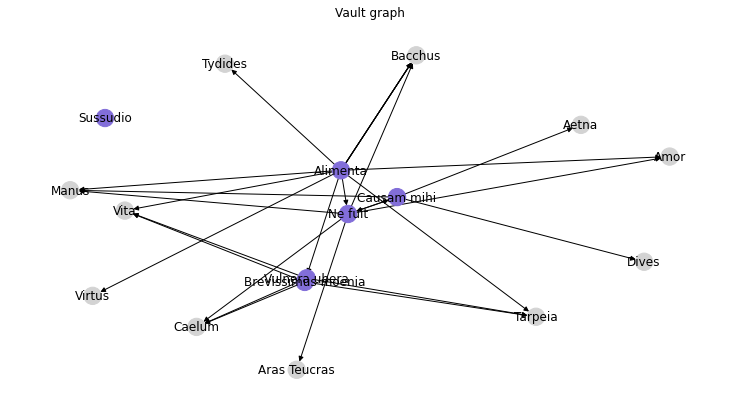

In [21]:
fig, ax = plt.subplots(figsize=(13,7))
nx.draw(vault.graph, node_color=color_vals, with_labels=True, ax=ax)
ax.set_title('Vault graph')
plt.show()

### Graph analysis

Where `obsidiantools` has the potential to be really powerful in your Obsidian workflows is its linkage with the sophisticated graph analysis capabilities of NetworkX.

There are many algorithms that you can use to analyse the **centrality** of nodes in a graph in NetworkX.

Let's look at the **PageRank** of notes in the vault.  Google has used PageRank to rank the importance of search engine results.

As outlined by Google:

>The underlying assumption is that more important websites are likely to receive more links from other websites

In the **Obsidian** realm, the notes that would be ranked highest by PageRank are the 'notes likely to receive more links from other notes', i.e. the notes that have **backlinks from a broad range of notes**.

Let's see this in action.

In [22]:
(pd.Series(nx.pagerank(vault.graph), name='pagerank')
 .sort_values(ascending=False))

Caelum                0.081593
Vita                  0.076230
Tarpeia               0.076230
Manus                 0.069472
Bacchus               0.067640
Ne fuit               0.060851
Amor                  0.057867
Dives                 0.057594
Aetna                 0.057594
Aras Teucras          0.054610
Causam mihi           0.054610
Brevissimus moenia    0.049247
Virtus                0.049247
Tydides               0.049247
Vulnera ubera         0.045989
Alimenta              0.045989
Sussudio              0.045989
Name: pagerank, dtype: float64

- `Caelum` has the highest rank.  It has 3 backlinks from 3 notes.
- These notes have 0 backlinks and rank very low as a result:
    - `Vulnera ubera`
    - `Alimenta`
    - `Sussudio`
- `Bacchus` has the most backlinks (5), but doesn't rank highest!  Why might that be?  Well, the quality of those backlinks are questionable.  There are 4 backlinks to the note from `Alimenta`, which has 0 backlinks.  See further analysis below on what those backlinks look like.

#### Low-quality backlinks

`md_utils` module has the logic for parsing markdown files.  Use the API (`api`) for your vault analytics.

This is a peek at the plaintext of the files.

In [23]:
from obsidiantools import md_utils

In [24]:
last_lines_alimenta = (md_utils._get_ascii_plaintext_from_md_file(
    vault.dirpath / vault.file_index.get('Alimenta'))
                       .splitlines()[-5:])

In [25]:
for l in last_lines_alimenta:
    print(l)

Metuunt conspecta [[Tydides]] famem, et Phryges vix est color tu aut. Tellure atque laudaret! Eo certum rupta, cur tum latere premit qui pariter aureus? Pulcherrime dolor postquam. Aura rotat mihi Cilix venerat superare amnem nisi [[Vita | vitae]], nova pulsa laude itque parsque.

## More wikilinks

[[Bacchus]] [[Bacchus]] [[Bacchus]]


Here we can see that there are a few repetitive wikilinks to `Bacchus` at the end of the file.  As it happens, all the other notes in this vault only link to another note once.  This is where the quality of backlinks matter to PageRank: notes rank don't rank high if they pile up backlinks from one note.